# In this notebook we are load our preprocess data which we done in our previous part and now will train the model on different linear regression algorithms



# Step 1: Import all the required libraries

- Pandas : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- Sklearn : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- Pickle : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- Seaborn : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
# import all required libraries
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import pandas as pd
import warnings
from sklearn import preprocessing
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
# Read csv file
df = pd.read_csv('credit_df2.csv')

In [3]:
df

Unnamed: 0      Time        V1        V2        V3        V4        V5  \
0         20565   31121.0  1.075088 -0.076083  1.230247  1.419456 -0.951743   
1        208637  137207.0 -0.365086  1.544058 -0.372254  0.875774  0.274405   
2        190283  128769.0  1.972001 -1.013318 -1.482539 -0.906273 -0.608342   
3          2918    2466.0  1.116144  0.513875  0.866488  2.512308 -0.262168   
4         22208   32106.0  0.104753 -0.334804  1.564846 -0.088991 -1.329205   
..          ...       ...       ...       ...       ...       ...       ...   
979      279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487   
980      280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581   
981      280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541   
982      281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618   
983      281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147   

           V6        V7        V8  ...       V21       V22       V23  \
0   -0.238912 -0.455634  0.041314  ...  0.023299  0.128494 -0.045330   
1   -0.146138  0.146545 -0.678973  ...  1.194392  1.064954 -0.073101   
2   -1.184226 -0.136211 -0.288721  ...  0.168147  0.134242  0.136717   
3   -0.268716 -0.001428  0.064595  ... -0.208885 -0.690477  0.224231   
4    0.468442 -0.519139 -0.519029  ...  0.569043 -0.811871  0.228935   
..        ...       ...       ...  ...       ...       ...       ...   
979 -2.010494 -0.882850  0.697211  ...  0.778584 -0.319189  0.639419   
980 -1.326536 -1.413170  0.248525  ...  0.370612  0.028234 -0.145640   
981 -0.003346 -2.234739  1.210158  ...  0.751826  0.834108  0.190944   
982 -2.943548 -2.208002  1.058733  ...  0.583276 -0.269209 -0.456108   
983 -0.096695  0.223050 -0.068384  ... -0.164350 -0.295135 -0.072173   

          V24       V25       V26       V27       V28  Amount  Class  
0    0.397901  0.380511 -0.390131  0.061758  0.047547   52.00      0  
1    0.751248 -0.421824  0.207204  0.033708  0.158261    6.04      0  
2    0.001912 -0.185726 -0.342852 -0.073079 -0.055386  117.61      0  
3    0.331436  0.103843 -0.254106  0.004526  0.027106    4.37      0  
4    0.101354  0.678528  1.052970 -0.009921  0.095247  103.98      0  
..        ...       ...       ...       ...       ...     ...    ...  
979 -0.294885  0.537503  0.788395  0.292680  0.147968  390.00      1  
980 -0.081049  0.521875  0.739467  0.389152  0.186637    0.76      1  
981  0.032070 -0.739695  0.471111  0.385107  0.194361   77.89      1  
982 -0.183659 -0.328168  0.606116  0.884876 -0.253700  245.00      1  
983 -0.450261  0.313267 -0.289617  0.002988 -0.015309   42.53      1  

[984 rows x 32 columns]

In [4]:
# Drop Unnamed: 0 column 
df = df.drop('Unnamed: 0',axis=1)

In [5]:
df

Time        V1        V2        V3        V4        V5        V6  \
0     31121.0  1.075088 -0.076083  1.230247  1.419456 -0.951743 -0.238912   
1    137207.0 -0.365086  1.544058 -0.372254  0.875774  0.274405 -0.146138   
2    128769.0  1.972001 -1.013318 -1.482539 -0.906273 -0.608342 -1.184226   
3      2466.0  1.116144  0.513875  0.866488  2.512308 -0.262168 -0.268716   
4     32106.0  0.104753 -0.334804  1.564846 -0.088991 -1.329205  0.468442   
..        ...       ...       ...       ...       ...       ...       ...   
979  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
980  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
981  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
982  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
983  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

           V7        V8        V9  ...       V21       V22       V23  \
0   -0.455634  0.041314  0.637142  ...  0.023299  0.128494 -0.045330   
1    0.146545 -0.678973 -0.759386  ...  1.194392  1.064954 -0.073101   
2   -0.136211 -0.288721 -0.862547  ...  0.168147  0.134242  0.136717   
3   -0.001428  0.064595 -0.637979  ... -0.208885 -0.690477  0.224231   
4   -0.519139 -0.519029  1.125538  ...  0.569043 -0.811871  0.228935   
..        ...       ...       ...  ...       ...       ...       ...   
979 -0.882850  0.697211 -2.064945  ...  0.778584 -0.319189  0.639419   
980 -1.413170  0.248525 -1.127396  ...  0.370612  0.028234 -0.145640   
981 -2.234739  1.210158 -0.652250  ...  0.751826  0.834108  0.190944   
982 -2.208002  1.058733 -1.632333  ...  0.583276 -0.269209 -0.456108   
983  0.223050 -0.068384  0.577829  ... -0.164350 -0.295135 -0.072173   

          V24       V25       V26       V27       V28  Amount  Class  
0    0.397901  0.380511 -0.390131  0.061758  0.047547   52.00      0  
1    0.751248 -0.421824  0.207204  0.033708  0.158261    6.04      0  
2    0.001912 -0.185726 -0.342852 -0.073079 -0.055386  117.61      0  
3    0.331436  0.103843 -0.254106  0.004526  0.027106    4.37      0  
4    0.101354  0.678528  1.052970 -0.009921  0.095247  103.98      0  
..        ...       ...       ...       ...       ...     ...    ...  
979 -0.294885  0.537503  0.788395  0.292680  0.147968  390.00      1  
980 -0.081049  0.521875  0.739467  0.389152  0.186637    0.76      1  
981  0.032070 -0.739695  0.471111  0.385107  0.194361   77.89      1  
982 -0.183659 -0.328168  0.606116  0.884876 -0.253700  245.00      1  
983 -0.450261  0.313267 -0.289617  0.002988 -0.015309   42.53      1  

[984 rows x 31 columns]

# Step 2: Data Preparation

Goal:-

Tasks we are going to in this step

1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
2. Split dataset into train and test dataset
3. Scaling on train dataset

# 1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.

In [6]:
# Spearate target and feature column in X and y variable
target = 'Class'
X = df.drop(target,axis=1)
y = df[target]

In [7]:
# Check the shape of X and y variable
X.shape, y.shape

((984, 30), (984,))

In [8]:
# Reshape the y variable 
y = y.values.reshape(-1,1)

In [9]:

# Again check the shape of X and y variable
X.shape, y.shape

((984, 30), (984, 1))

# 2. Split dataset into train and test dataset

Here we are spliting our dataset into 80/20 percentage where 80% dataset goes into the training and 20% goes into testing the part.

In [10]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((787, 30), (197, 30), (787, 1), (197, 1))

# Step 3: Model Training

Goal:- In this step we are going to train our dataset on different classification algorithms. As we know that our target variable is in continous format so we have to apply classification algorithm as our target varibal is a category like filtering.In our dataset we have the outcome variable or Dependent variable i.e Y having only two set of values, either M (Malign) or B(Benign). So we will use Classification algorithm

**Algorithms we are going to use in this step.**

1. Logistic Regression
2. Nearest Neighbor
3. Random Forest Classification

In [12]:
# Define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).


# 1. Logistic Regression

Train set cross-validation




In [13]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression

log_R = LogisticRegression()



In [14]:
log_R.fit(X_train, y_train)


LogisticRegression()

In [15]:
#accuracy check of trainig data
#Get R2 score
log_R.score(X_train, y_train)


0.940279542566709

In [16]:
#accuracy of test data
log_R.score(X_test, y_test) 

0.9441624365482234

# PREDICT

In [17]:
# predict the values on X_test_scaled dataset 
y_predicted = log_R.predict(X_test)

In [18]:
y_predicted

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1])

In [19]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

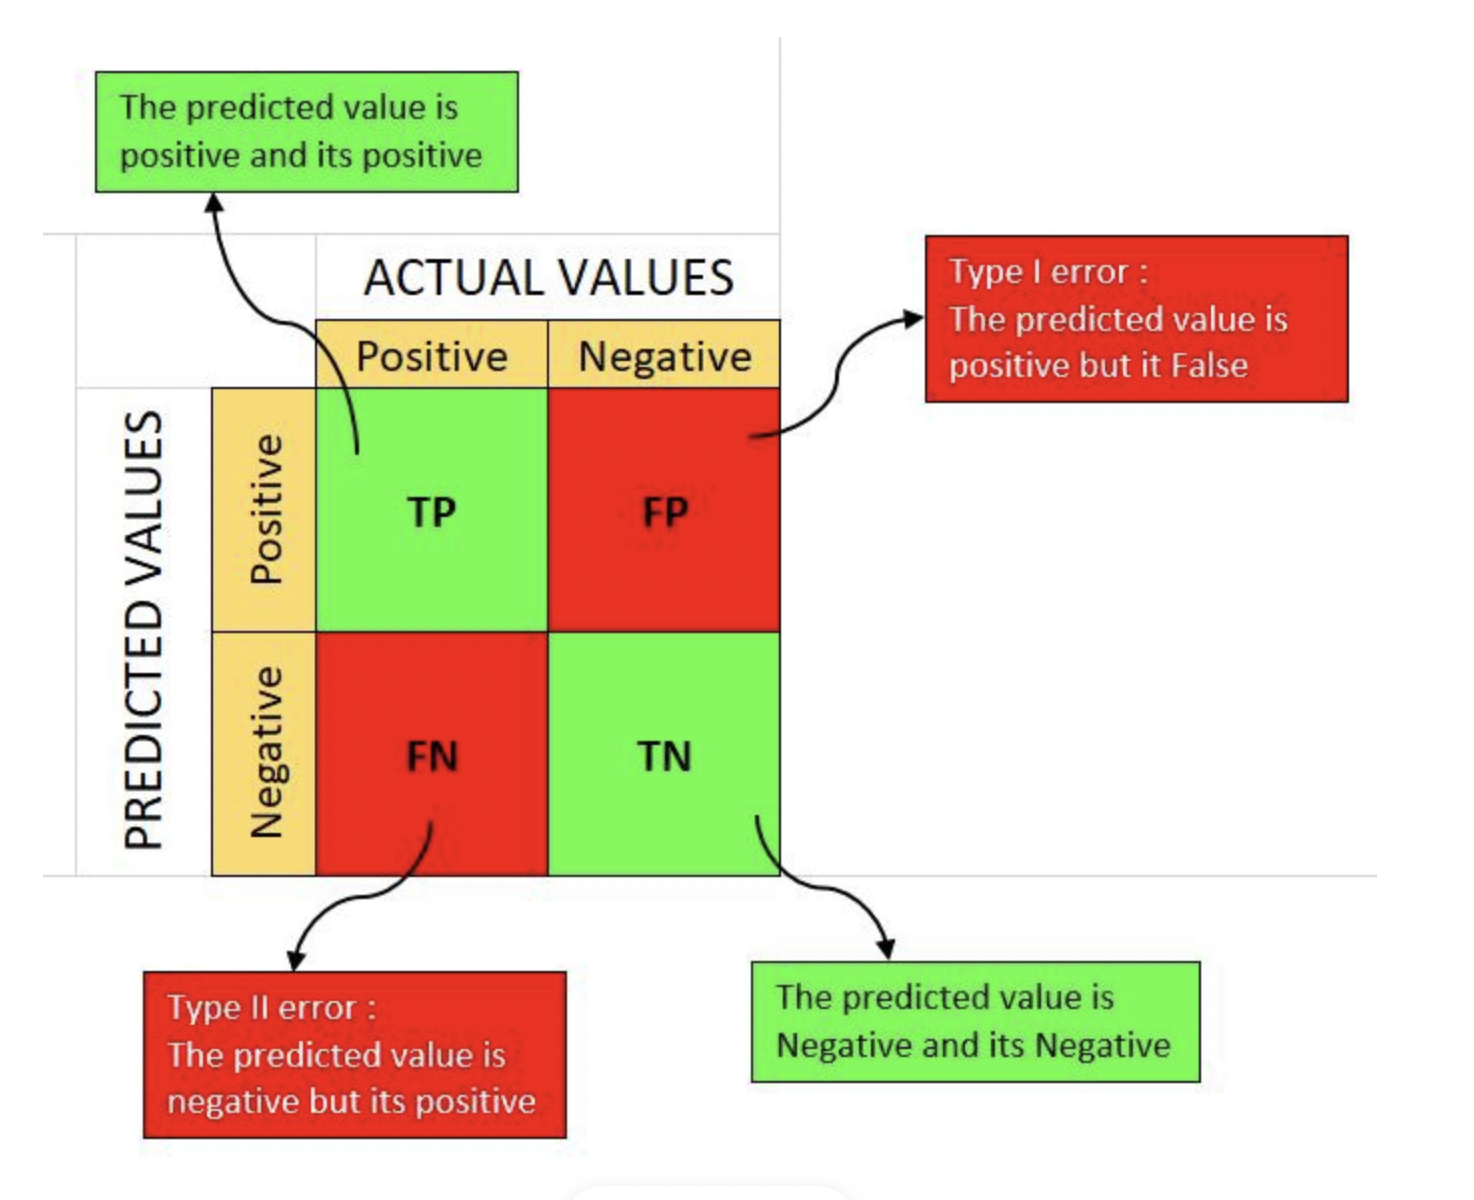

For you to under it better:

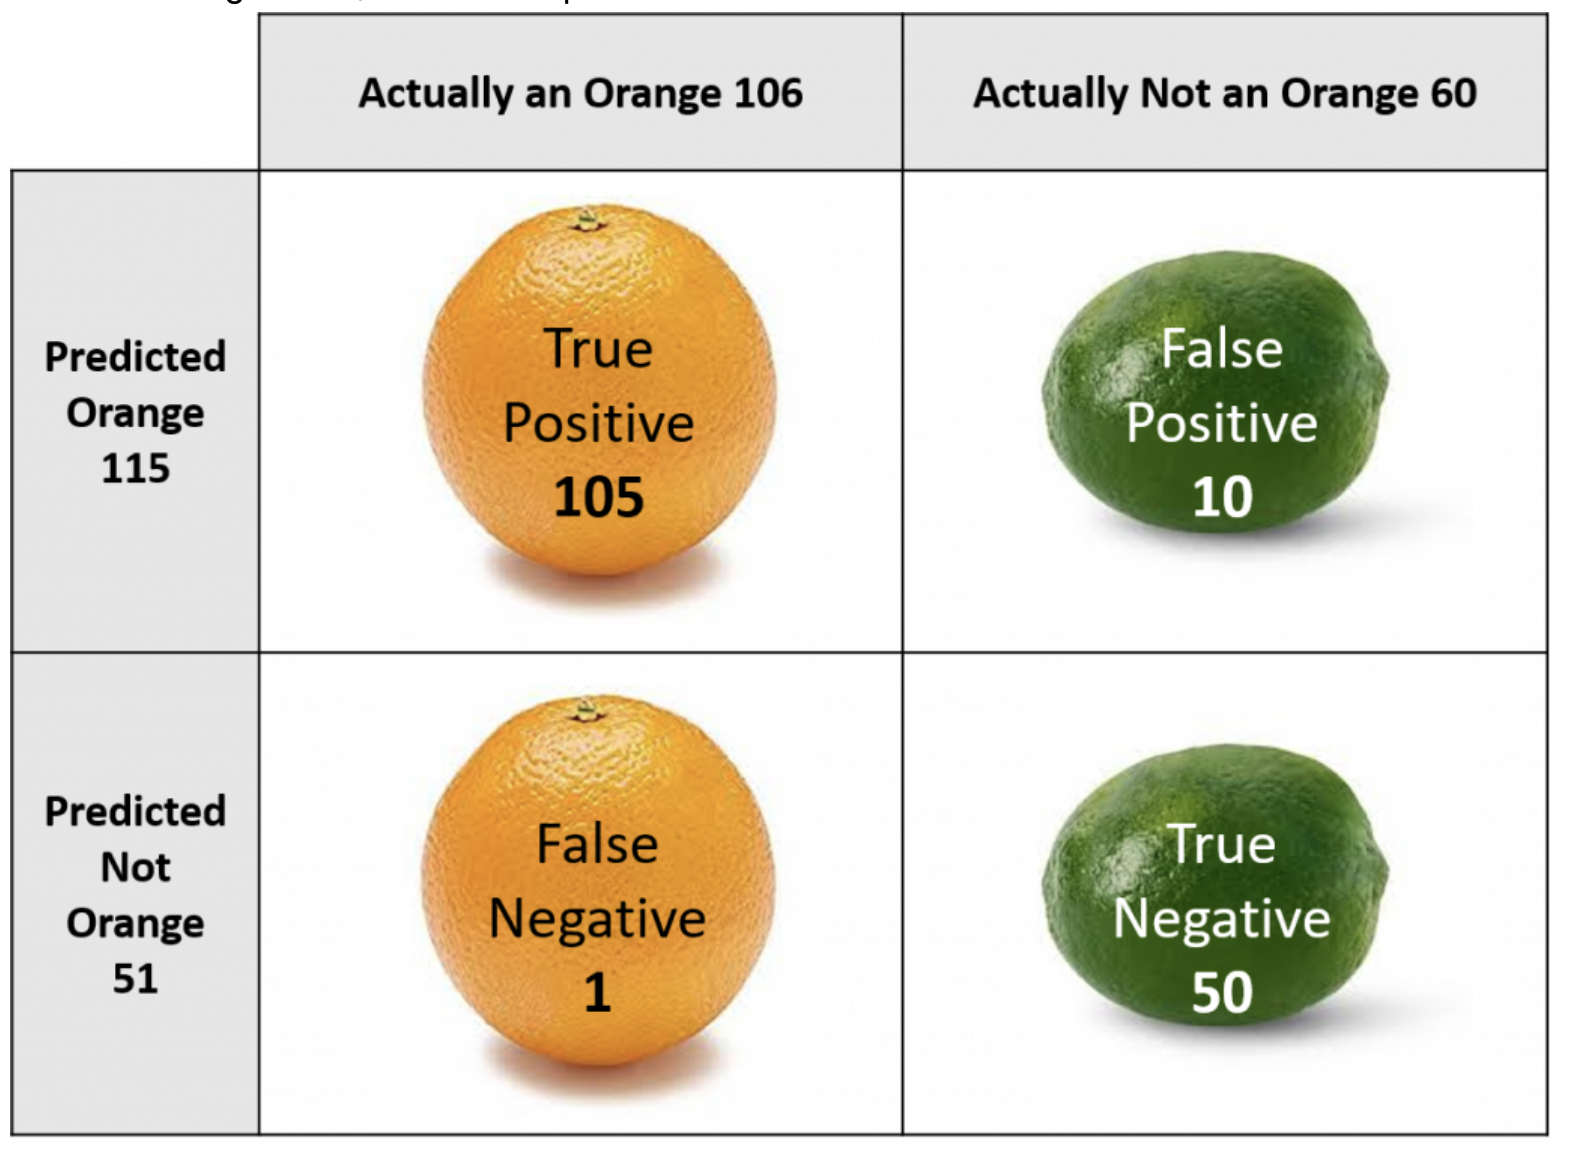

In [20]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(33.0, 0.5, 'True Class')

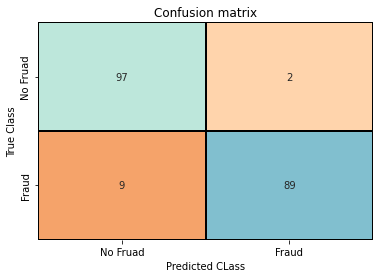

In [21]:
#We are drawing cm on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.heatmap(cm,cmap = 'icefire_r', annot = True, fmt= 'd', cbar=False, linecolor='Black', linewidth = 2)
plt.title("Confusion matrix")
plt.xticks(np.arange(2)+.5,['No Fruad', 'Fraud'])
plt.yticks(np.arange(2)+.5,['No Fruad', 'Fraud'])
plt.xlabel('Predicted CLass')
plt.ylabel('True Class')


<AxesSubplot:>

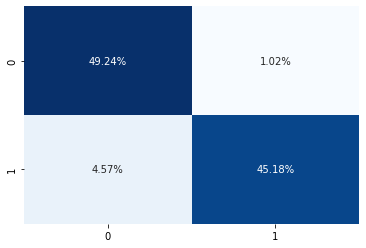

In [22]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)


# Building all kinds of evaluating parameters

In [23]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is Logistic Regression")
  
acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is {}".format(acc))
  
prec = precision_score(y_test, y_predicted)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, y_predicted)
print("The recall is {}".format(rec))
  
f1 = f1_score(y_test, y_predicted)
print("The F1-Score is {}".format(f1))
  


The model used is Logistic Regression

The accuracy is 0.9441624365482234
The precision is 0.978021978021978
The recall is 0.9081632653061225
The F1-Score is 0.9417989417989417


# 2. Random Forest

In [24]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier

clas = RandomForestClassifier()
clas.fit(X_train, y_train)


RandomForestClassifier()

In [25]:
#accuracy check of trainig data
#Get R2 score
clas.score(X_train, y_train)

1.0

In [26]:
#accuracy of test data
clas.score(X_test, y_test) 

0.934010152284264

# Predicted

In [27]:
# predict the values on X_test_scaled dataset 
y_predicted = clas.predict(X_test)

In [28]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [29]:
#confusion matrix btw y_test and y_predicted
cm  = confusion_matrix(y_test,y_predicted)

Text(33.0, 0.5, 'True Class')

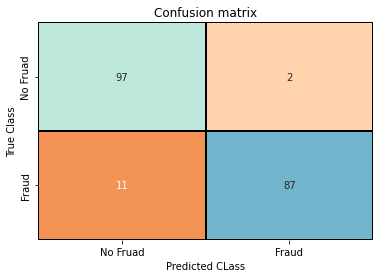

In [30]:
#We are drawing cm on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.heatmap(cm,cmap = 'icefire_r', annot = True, fmt= 'd', cbar=False, linecolor='Black', linewidth = 2)
plt.title("Confusion matrix")
plt.xticks(np.arange(2)+.5,['No Fruad', 'Fraud'])
plt.yticks(np.arange(2)+.5,['No Fruad', 'Fraud'])
plt.xlabel('Predicted CLass')
plt.ylabel('True Class')


<AxesSubplot:>

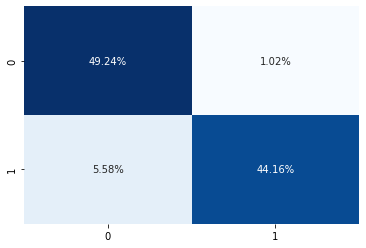

In [31]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)


# Building all kinds of evaluating parameters

In [32]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is Random Forest classifier")
  
acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is {}".format(acc))
  
prec = precision_score(y_test, y_predicted)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, y_predicted)
print("The recall is {}".format(rec))
  
f1 = f1_score(y_test, y_predicted)
print("The F1-Score is {}".format(f1))
  


The model used is Random Forest classifier

The accuracy is 0.934010152284264
The precision is 0.9775280898876404
The recall is 0.8877551020408163
The F1-Score is 0.9304812834224598


# 3. K - Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier( )


In [34]:
Knn.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
#accuracy check of trainig data
#Get R2 score
Knn.score(X_train, y_train)


0.7827191867852605

In [36]:
#accuracy of test data
Knn.score(X_test, y_test) 

0.6802030456852792

# Predict

In [37]:
# predict the values on X_test_scaled dataset 
y_predicted = Knn.predict(X_test)

In [38]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [39]:
#confusion matrix btw y_test and y_predicted
cm  = confusion_matrix(y_test,y_predicted)

Text(33.0, 0.5, 'True Class')

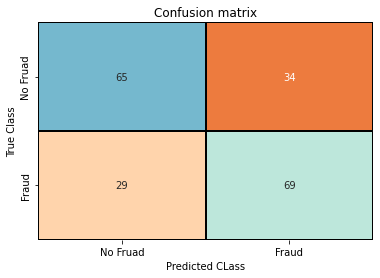

In [40]:
#We are drawing cm on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.heatmap(cm,cmap = 'icefire_r', annot = True, fmt= 'd', cbar=False, linecolor='Black', linewidth = 2)
plt.title("Confusion matrix")
plt.xticks(np.arange(2)+.5,['No Fruad', 'Fraud'])
plt.yticks(np.arange(2)+.5,['No Fruad', 'Fraud'])
plt.xlabel('Predicted CLass')
plt.ylabel('True Class')


<AxesSubplot:>

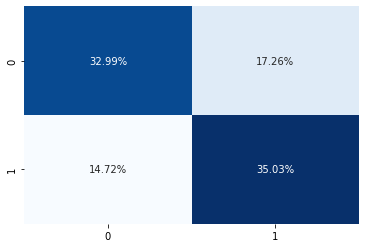

In [41]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)


In [42]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is KNeighbors Classifier")
  
acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is {}".format(acc))
  
prec = precision_score(y_test, y_predicted)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, y_predicted)
print("The recall is {}".format(rec))
  
f1 = f1_score(y_test, y_predicted)
print("The F1-Score is {}".format(f1))
  


The model used is KNeighbors Classifier

The accuracy is 0.6802030456852792
The precision is 0.6699029126213593
The recall is 0.7040816326530612
The F1-Score is 0.6865671641791046


# Insight:

- As you can see with our Random Forest Model(0.9035 or 90.35%) we are getting a better result even for the recall (0.8775 or 87.75%) which is the most tricky part.
- So we gonna save our model with Random Forest Algorithm


# Step 4: Save Model
Goal:- In this step we are going to save our model in pickel format file.

In [43]:
import pickle
pickle.dump(clas , open('Credit_card.pkl', 'wb'))



In [44]:
import pickle

def model_prediction(features):
    
    pickled_model = pickle.load(open('Credit_card.pkl','rb'))
    Fraud = str((list(pickled_model.predict(features))))
    
    return str(Fraud)